# Question 4:

### Importing of Libraries & Loading of the data set into a dataframe

In [48]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_set  = pd.read_csv('fashion-mnist_test.csv')
train_set = pd.read_csv('fashion-mnist_train.csv')
test_df   = test_set.copy()
train_df  = train_set.copy()

### Performing exploratory data analysis 

#### Step 1: Shape Analysis

In [49]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

We can note here that there are 785 attributes, we shall explore these attributes further. On the other hand, we have 60,000 rows or training samples in the training dataset and 10,000 training samples in the test dataset.

In [50]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examining the attributes further, we can see that the target variable indicating the type of clothing item is the Label property, whereas the remaining 784 columns are pixel values.

#### Step 2: Missing Value Analysis

In [51]:
train_df.isnull().any().sum()

0

In [52]:
test_df.isnull().any().sum()

0

NO NULL values found in test or training dataset.

#### Step 2: Target Analysis: Class distribution

In [53]:
# Create a dictionary for each type of label 
labels_dict = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [54]:
train_df['label'].value_counts()


2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [55]:
test_df['label'].value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

Equal distribution of label classes, As we can see, All of the labels have an equal 10% share of samples in the total data samples in both test and training datasets. Let's visualize this.

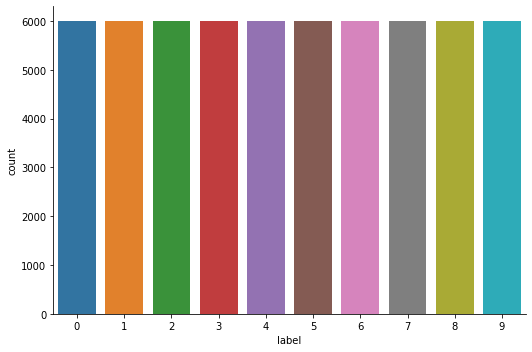

In [56]:
sns.catplot(x='label', data=train_df, kind='count', height=5, aspect= 1.5)

#### Sample Images of each Label from the Dataset

Here, we show a random set of FIVE (5) images from each class in the dataset with their corresponding class names.

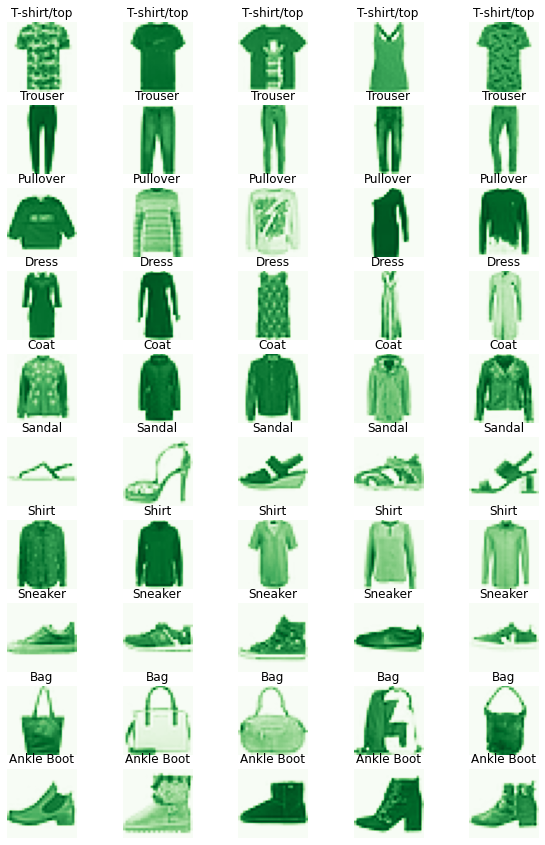

In [57]:
def sample_images_by_label(df):
    fig, axes = plt.subplots(10, 5, figsize = (10,15))
    for label, row in enumerate(axes):
        spec_df = df[df['label']==label]
        for n,axe in enumerate(row):
            img = spec_df.drop('label', axis=1).values[n].reshape(28,28)
            axe.imshow(img, cmap='Greens')
            axe.set_title(labels_dict[label])
            axe.set_axis_off()

sample_images_by_label(train_df)


### Data Preprocessing:

To get ready for the model, we will first preprocess the data.

The columns are changed from (784) to (28,28,1). Additionally, we store the label (target) feature as a distinct vector.

Therefore, we write a pre-processing function that takes a dataframe and returns inputs and output variables as two different sets. Moreover, the interesting part is that it encodes the output which is label Y dataframe as well. For the Pixels, It is able to normalize the [0-255] value into [0,1].

On top of this, this is also able to Reshape the images since they are in 1-D form and we must change them to 3D form for CNN execution.

In [62]:
def preprocessingData(df):
    y_output = keras.utils.to_categorical(df.label,10)
    num_images = df.shape[0]
    x_as_array = df.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    x_output = x_shaped_array / 255
    return x_output, y_output

Both the train data and the test data are pre-processed

In [69]:
from sklearn.model_selection import train_test_split
X, y = preprocessingData(train_set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1018)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
testset_x, testset_y = preprocessingData(test_set)

(51000, 28, 28, 1)
(51000, 10)
(9000, 28, 28, 1)
(9000, 10)


### Training of the Convolutional Neural Network(CNN)

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Using Sequential() to initialize the model, we add each layer one at a time, starting with the input.
We incorporate TWO (2) convolutional layers, which serve as the foundation for convnets.
MaxPooling Layer For Dimensionality Reduction is placed after each Convolutional Layer. It may aid in lowering overfitting.
We include a Flatten layer to map the input to a 1D vector. Following that, we add FOUR (4) dense or completely connected layers. They combine all the characteristics from theprior layers.
Our Output Layer is one of these dense layers; it employs softmax activation and has units equal to the number of unique classes.

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [70]:
train_model = model.fit(X_train, y_train, batch_size=128, epochs=25, verbose=1, validation_data=(X_test, y_test))

Epoch 1/25
399/399 [==============================] - 29s 70ms/step - loss: 0.2601 - accuracy: 0.9055 - val_loss: 0.2993 - val_accuracy: 0.8867
Epoch 2/25
399/399 [==============================] - 39s 98ms/step - loss: 0.2339 - accuracy: 0.9137 - val_loss: 0.3000 - val_accuracy: 0.8886
Epoch 3/25
399/399 [==============================] - 44s 110ms/step - loss: 0.2138 - accuracy: 0.9214 - val_loss: 0.2668 - val_accuracy: 0.8999
Epoch 4/25
399/399 [==============================] - 47s 118ms/step - loss: 0.1931 - accuracy: 0.9289 - val_loss: 0.3077 - val_accuracy: 0.8920
Epoch 5/25
399/399 [==============================] - 48s 120ms/step - loss: 0.1794 - accuracy: 0.9341 - val_loss: 0.2839 - val_accuracy: 0.9000
Epoch 6/25
399/399 [==============================] - 43s 109ms/step - loss: 0.1604 - accuracy: 0.9404 - val_loss: 0.2667 - val_accuracy: 0.9089
Epoch 7/25
399/399 [==============================] - 44s 109ms/step - loss: 0.1463 - accuracy: 0.9453 - val_loss: 0.2670 - val_accu

### Evaluation of the CNN Model

In [71]:
score = model.evaluate(X_test, y_test, verbose=0)
loss_percentage = score[0]*100
accuracy_percentage = score[1]*100
print('Accuracy percentage on Test set      :', accuracy_percentage)
print('Test loss percentage on Test set     :', loss_percentage)


Accuracy percentage on Test set      : 90.39999842643738
Test loss percentage on Test set     : 54.87473011016846


#### Loss & Accuracy vs Epoch Number

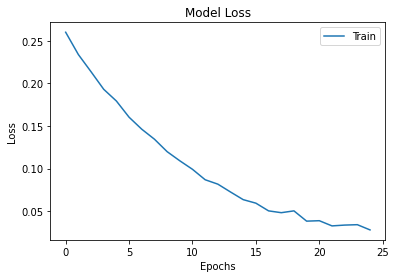

In [75]:
plt.plot(train_model.history['loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

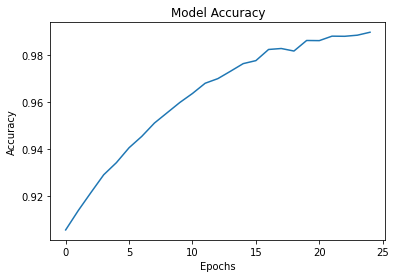

In [76]:
plt.plot(train_model.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

These graphs depict a distinct trend whereby, for a sizable dataset, such as the Training dataset, we can observe a definite rise in accuracy and decrease in loss as the number of Epochs is increased.

### Predictions

In [77]:
testset_x.shape

(10000, 28, 28, 1)

We have to Pick a random image from the test dataset, pass it to the algorithm and compare the algorithm output with the actual class label

In [81]:
#Test dataset has 10,000 rows. Let's pick a random seed.
random_ind = np.random.randint(10000)

testset_prediction = model.predict(testset_x)
testset_prediction = np.argmax(testset_prediction,axis = 1)
testset_actuals    = np.argmax(testset_y,axis = 1)

print("Predicted label == Actual Label?", testset_prediction[random_ind] == testset_actuals[random_ind])
print("Predicted Label is: {0}, Actual Label is: {1}".format(testset_prediction[random_ind],testset_actuals[random_ind]))

313/313 [==============================] - 1s 4ms/step
Predicted label == Actual Label? True
Predicted Label is: 5, Actual Label is: 5


We see that if we pick a random image from the original test dataset, our model has a very high chance of predicting it correctly. Let's see the accuracy score of our model on the original test dataset.

In [84]:
def acc_test(pred,true):
    true_count = 0
    total_count = len(true)
    for i in range(0,total_count):
        if (true[i] == pred[i]):
            true_count += 1
    return true_count/total_count

print("Accuracy Results (in percentage): ", acc_test(testset_prediction,testset_actuals)*100)

Accuracy Results (in percentage):  91.14


#### Confusion Matrix

To Describe the performance of our classifier we can use Confusion matrix. 

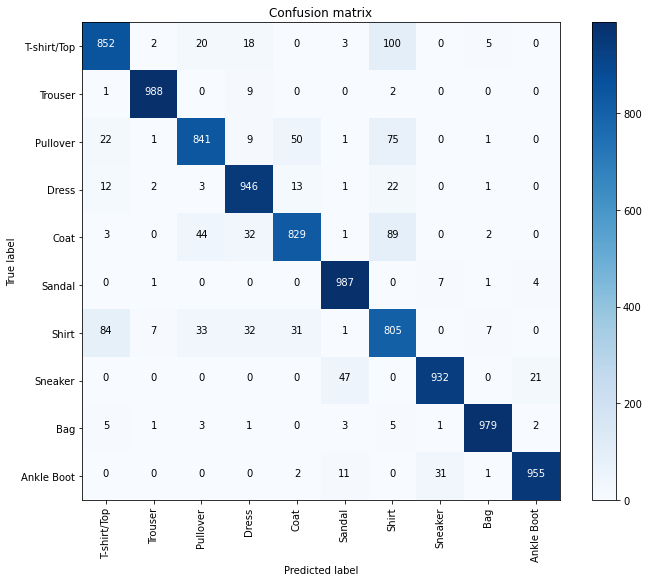

In [92]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=[10,8])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(testset_actuals, testset_prediction) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

We note that numerous T-shirts are misclassified as Shirt and vice versa. And Shirts are wrongly classified as a Coat.

#### Hence, We can note that Our Classifier is quite accurate while classifying an image of clothing items using the pixels. It has shown an accuracy of 91% on both the test set from within the training dataset and the test dataset itself. Which is quite remarkable. I believe it is possible to enchance this classifier and make it even better by analyzing where and how the misclassifications are occuring.